## Test Notebook for sklearn and the pyspch.stats.Densities module that is built on top of it 

08/02/2022: tested with v0.6      
19/04/2022: v0.6.5   
27/09/2022: v0.7   
status: this file needs to be cleaned up and test should be on Densities module and as little as possible on new definitions in this file


In [1]:
#!pip install git+https://github.com/compi1234/pyspch.git
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
import matplotlib.pyplot as plt
import seaborn as sns
cmap = sns.light_palette("caramel",50,input="xkcd")
import pandas as pd

from IPython.display import display, HTML, clear_output
from scipy.special import logsumexp
from scipy.stats import norm

from pyspch.core.sequence_data import make_seq1, make_seq1d
from pyspch.stats import probdist
import pyspch.display as Spd
import pyspch.core as Spch

In [3]:
# A wrapper class around CategoricalNB
# The logprob equivalent to Densities.Discrete
class Dist_Discr(CategoricalNB):
    """
    feature_log_prob_ : list of arrays of shape (n_features,)
        Each holds an array of shape (n_classes, n_categories of respective feature) for each feature.
    """
    def print_model(self,per_class=False):
        if per_class:
            n_classes = len(self.classes_)
            for i in range(n_classes): self.print_class(i)
        else:
            n_features = len(self.feature_log_prob_)
            for i in range(n_features): self.print_feature(i)
            
    def print_feature(self,feat_id):            
        print(" ++ Feature(%d) ++ "%feat_id)
        proba = np.exp(self.feature_log_prob_[feat_id])
        print(proba)

    def predict_log_prob(self,X):
        jll = np.zeros((X.shape[0], self.class_count_.shape[0]))
        for i in range(self.n_features_in_):
            indices = X[:, i]
            jll += self.feature_log_prob_[i][:, indices].T
        return jll
    
    def predict_prob(self,X):
        return( np.exp( self.predict_log_prob(X)))
    
    def get_class_log_proba(self,class_id):
        """ get probs per class as n_feature lists of prob arrasy """
        class_data = []
        n_features = len(self.feature_log_prob_)
        for j in range(n_features):
            proba = self.feature_log_prob_[j][class_id,:]
            class_data.append(proba)
        return(class_data)
    
    def get_class_proba(self,class_id):
        """ get probs per class as n_feature lists of prob arrasy """
        class_data = []
        n_features = len(self.feature_log_prob_)
        for j in range(n_features):
            proba = np.exp(self.feature_log_prob_[j][class_id,:])
            class_data.append(proba)
        return(class_data)
    
    def print_class(self,class_id):
        print(" ++ Class(%d) ++ "%class_id)
        n_features = len(self.feature_log_prob_)
        for j in range(n_features):
            proba = np.exp(self.feature_log_prob_[j][class_id,:])
            print(proba)

    def plot_model(self):
        barwidth = .2
        n_features = len(self.feature_log_prob_)
        f,ax = plt.subplots(1,n_features,figsize=(14,5))
        for j in range(n_features):
            proba = np.exp(self.feature_log_prob_[j])
            nclass,nbins = proba.shape
            xs = np.arange(nbins)
            for i in range(nclass):
                ax[j].bar(xs+i*barwidth,proba[i,:],width=barwidth)
                ax[j].set_xticks([xx for xx in range(nbins) ])
            ax[j].legend(np.arange(nclass))


''

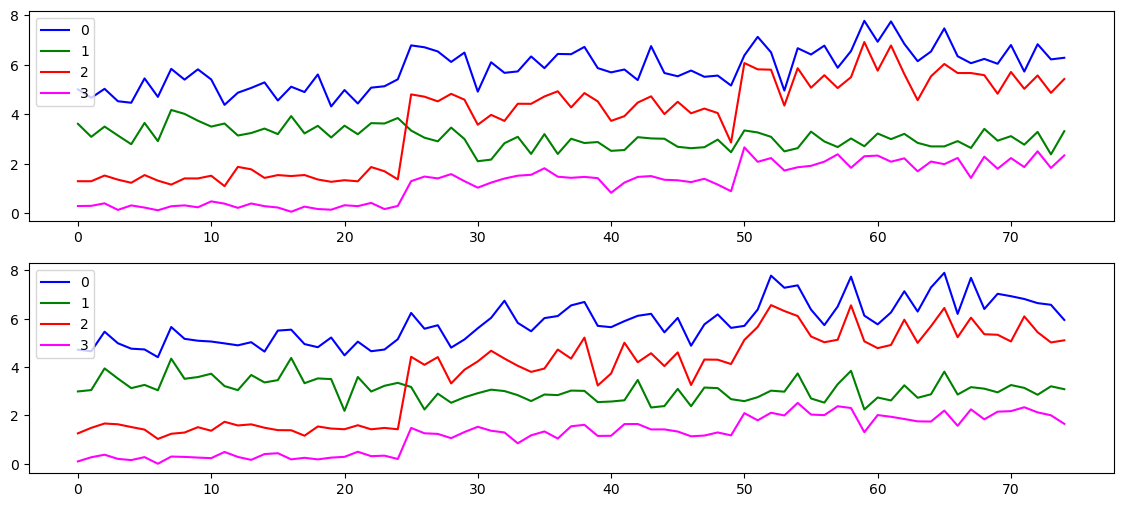

In [4]:
(X1,y1)= make_seq1(subset=1)
(X2,y2)= make_seq1(subset=2)
f,ax=plt.subplots(2,figsize=(14,6))
ax[0].plot(X1)
ax[1].plot(X2)
ax[0].legend(np.arange(4))
ax[1].legend(np.arange(4))
;

In [5]:
gModel1 = probdist.Gaussian()
gModel1.fit(X1, y1)
gModel1.print_model()

,prior,mean,var
0,0.333333,"[5.0121108870705235, 3.450159369350311, 1.4377...","[0.18582370232000572, 0.11639295088182065, 0.0..."
1,0.333333,"[5.976329483831145, 2.807610869769764, 4.29237...","[0.26591914692325647, 0.1140355996238682, 0.22..."
2,0.333333,"[6.523769565848742, 2.951075751402641, 5.54099...","[0.36939680622336873, 0.08236949321841769, 0.3..."


### Gaussian Distributions
#### 1. Training
Train on Set 1 and Test on Set 2

In [6]:
gModel1 = probdist.Gaussian()
gModel1.__dict__

{'priors': None, 'var_smoothing': 1e-09}

In [7]:
# create some data
#
# train a Gaussian model from the training data
gModel1 = probdist.Gaussian()
gModel1.fit(X1, y1)
gModel1.print_model()

,prior,mean,var
0,0.333333,"[5.0121108870705235, 3.450159369350311, 1.4377...","[0.18582370232000572, 0.11639295088182065, 0.0..."
1,0.333333,"[5.976329483831145, 2.807610869769764, 4.29237...","[0.26591914692325647, 0.1140355996238682, 0.22..."
2,0.333333,"[6.523769565848742, 2.951075751402641, 5.54099...","[0.36939680622336873, 0.08236949321841769, 0.3..."


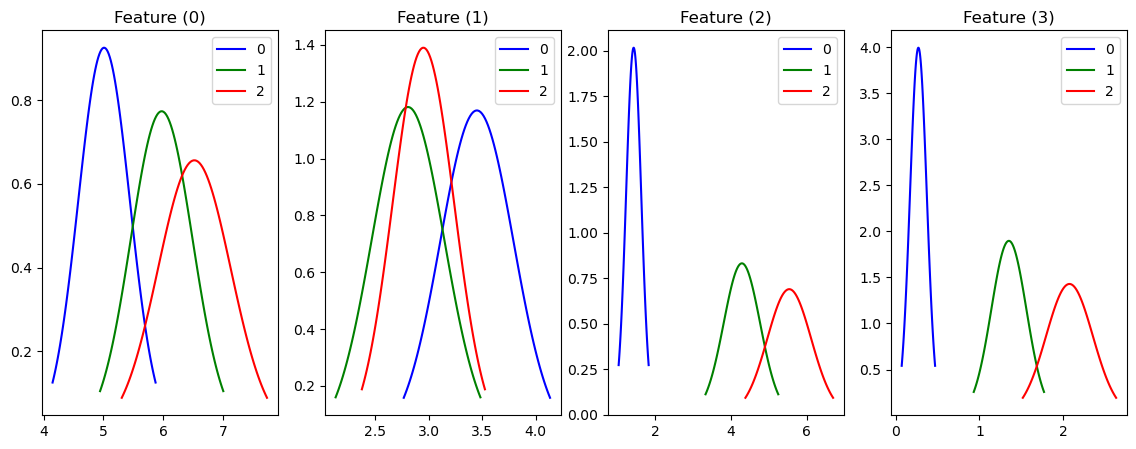

In [8]:
gModel1.plot_model()

In [9]:
gModel1.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'classes_': array([0, 1, 2]),
 'n_features_in_': 4,
 'epsilon_': 3.1505142386142607e-09,
 'theta_': array([[5.01211089, 3.45015937, 1.43771237, 0.26894305],
        [5.97632948, 2.80761087, 4.29237513, 1.35150322],
        [6.52376957, 2.95107575, 5.54099059, 2.07645482]]),
 'var_': array([[0.1858237 , 0.11639295, 0.0391321 , 0.00997495],
        [0.26591915, 0.1140356 , 0.22988765, 0.04420655],
        [0.36939681, 0.08236949, 0.33417892, 0.07790742]]),
 'class_count_': array([25., 25., 25.]),
 'class_prior_': array([0.33333333, 0.33333333, 0.33333333])}

In [10]:
mu = np.array([
    [5.5, 3.5, 3.,.5],
    [6., 2.75, 4., 1.5  ],
    [6.5, 3.0, 5., 2.]
])
gModel2 = probdist.Gaussian()
gModel2.init_model(mu=mu,class_prior=[.5,.2,.3])
#gModel2.var_ = np.ones((gModel2.theta_.shape))
#gModel2.n_features_in_ = 4
#gModel2.class_prior_ = np.ones(gModel2.n_classes)/gModel2.n_classes
gModel2.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'n_classes': 3,
 'n_features_in_': 4,
 'theta_': array([[5.5 , 3.5 , 3.  , 0.5 ],
        [6.  , 2.75, 4.  , 1.5 ],
        [6.5 , 3.  , 5.  , 2.  ]]),
 'var_': array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 'classes_': array([0, 1, 2]),
 'class_prior_': array([0.5, 0.2, 0.3])}

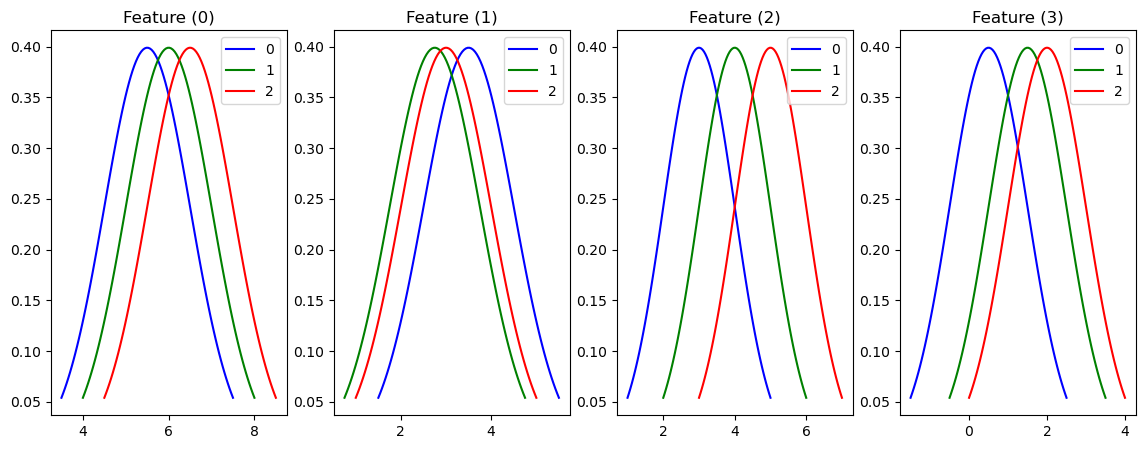

In [11]:
gModel2.plot_model()

### Posteriors and Log Posteriors

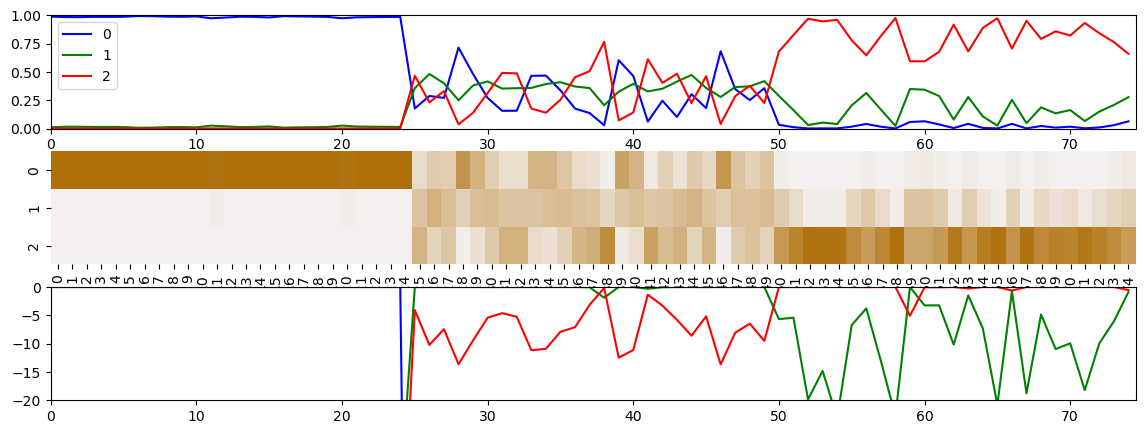

In [12]:
probs=gModel2.predict_proba(X2)
log_probs=gModel1.predict_log_proba(X2)
f,ax=plt.subplots(3,figsize=(14,5))
ax[0].plot(probs)
ax[0].set_xlim([0.,probs.shape[0]-.5])
ax[0].set_ylim([0,1.])
ax[0].legend(gModel1.classes_)
sns.heatmap(probs.T,ax=ax[1],vmax=1,vmin=0.0,yticklabels=gModel1.classes_,
            cmap=cmap,cbar=False, linewidth=0, linecolor='k')
ax[2].plot(log_probs)
ax[2].set_xlim([0.,probs.shape[0]-.5])
ax[2].set_ylim([-20,0.]);

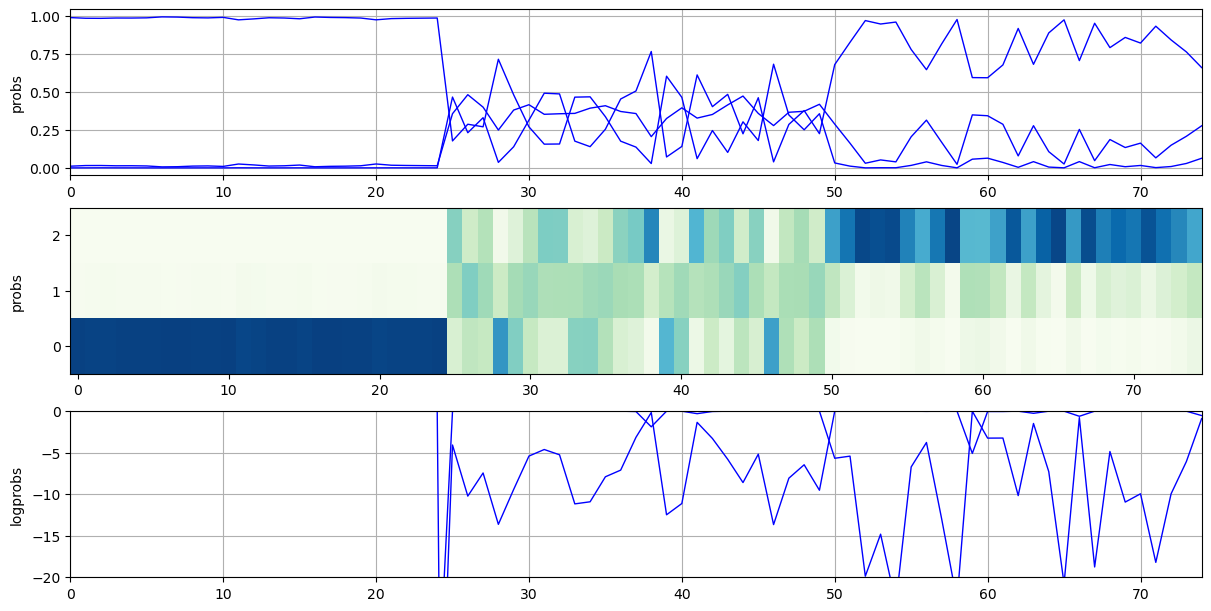

In [13]:
fig = Spd.SpchFig(row_heights=[1.,1.,1.])
fig.add_line_plot(probs.T,iax=0,ylabel='probs')
fig.add_img_plot(probs.T,iax=1,cmap='GnBu',ylabel='probs')
fig.add_line_plot(log_probs.T,iax=2,yrange=[-20.,0.],ylabel='logprobs')
display(fig)

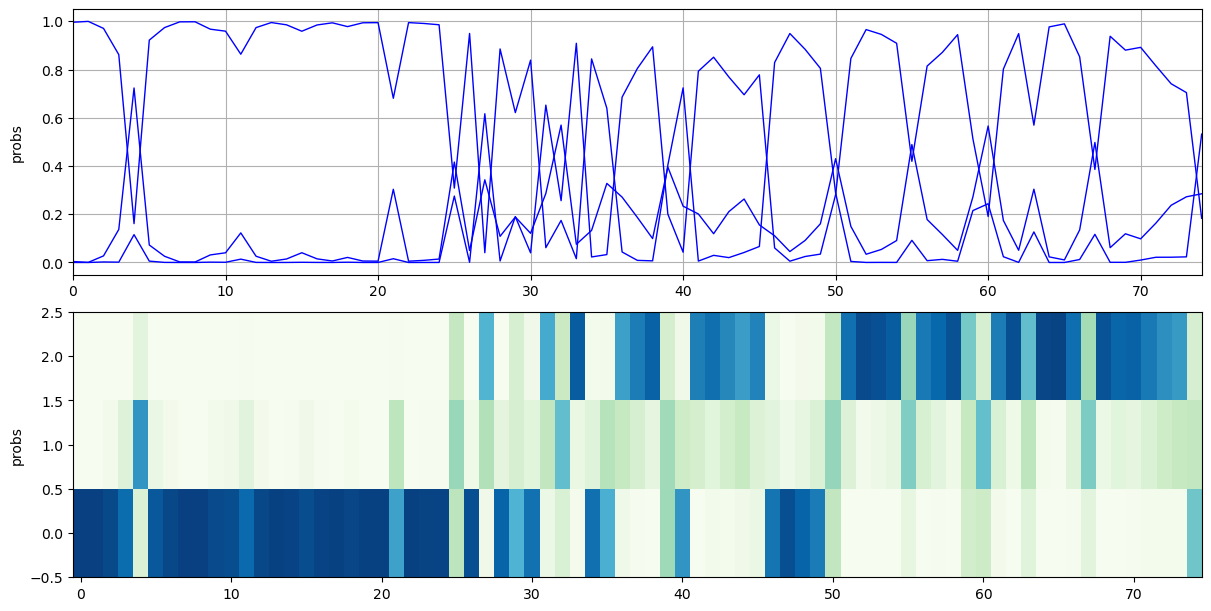

In [14]:
# let's make a bit harder by adding some noise to the test data
X3 = X2 + np.random.normal(loc=0.,scale=1,size=X2.shape)
probs=gModel2.predict_proba(X3)
log_probs=gModel1.predict_log_proba(X3)
fig = Spd.SpchFig(row_heights=[1.,1.])
fig.add_line_plot(probs.T,iax=0,ylabel='probs')
fig.add_img_plot(probs.T,iax=1,cmap='GnBu',ylabel='probs')
display(fig)

### Classification

In [15]:
y_pred = gModel2.predict(X2)
print("Test Set: Number of mislabeled points out of a total %d points : %d" % (X2.shape[0], (y2 != y_pred).sum()))
y_pred = gModel2.predict(X3)
print("Noisy Set: Number of mislabeled points out of a total %d points : %d" % (X3.shape[0], (y2 != y_pred).sum()))

Test Set: Number of mislabeled points out of a total 75 points : 18
Noisy Set: Number of mislabeled points out of a total 75 points : 29


## Discrete Densities aka Categorical NB

In [16]:
(X1d,y1) = make_seq1d(subset=1)
(X2d,y2) = make_seq1d(subset=2)
(X3d,y3) = make_seq1d(noise=1,subset=2)
#

In [17]:
X1d = X1d[:,0:2]
X2d = X2d[:,0:2]
X3d = X3d[:,0:2]

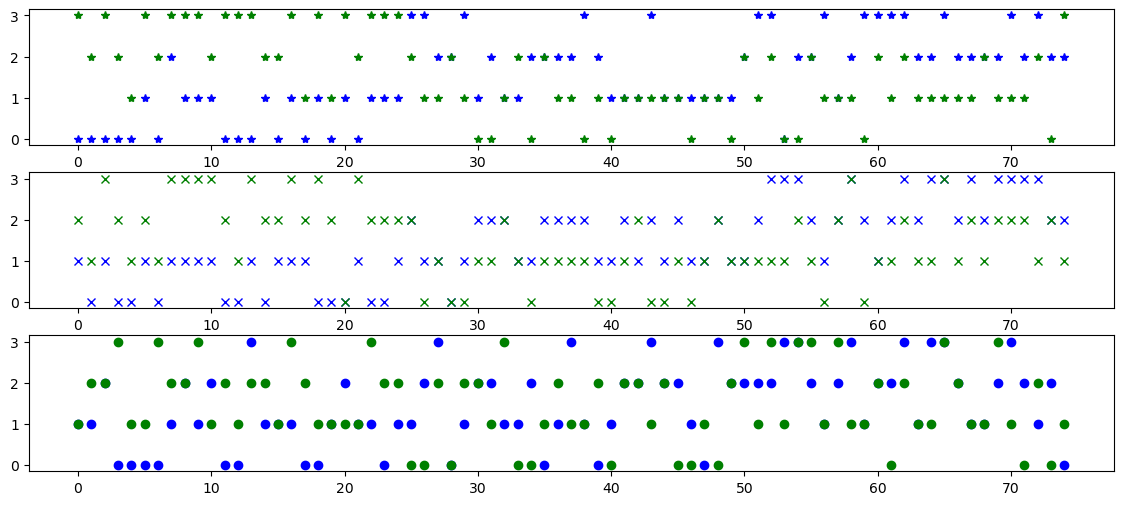

In [18]:
f,ax=plt.subplots(3,figsize=(14,6))
ax[0].plot(X1d,'*')
ax[1].plot(X2d,'x');
ax[2].plot(X3d,'o');

In [19]:
dd1 = Dist_Discr()
dd1.fit(X=X1d,y=y1)

Dist_Discr()

In [20]:
dd1._get_param_names()

['alpha', 'class_prior', 'fit_prior', 'force_alpha', 'min_categories']

In [21]:
dd1.get_params(), dd1.__dict__

({'alpha': 1.0,
  'class_prior': None,
  'fit_prior': True,
  'force_alpha': 'warn',
  'min_categories': None},
 {'alpha': 1.0,
  'fit_prior': True,
  'class_prior': None,
  'force_alpha': 'warn',
  'min_categories': None,
  'n_features_in_': 2,
  'classes_': array([0, 1, 2]),
  'class_count_': array([25., 25., 25.]),
  'category_count_': [array([[13., 11.,  1.,  0.],
          [ 0., 12.,  8.,  5.],
          [ 1.,  1., 13., 10.]]),
   array([[ 0.,  3.,  7., 15.],
          [ 7., 14.,  4.,  0.],
          [ 4., 13.,  7.,  1.]])],
  'n_categories_': array([4, 4]),
  'feature_log_prob_': [array([[-0.7282385 , -0.88238918, -2.67414865, -3.36729583],
          [-3.36729583, -0.80234647, -1.17007125, -1.57553636],
          [-2.67414865, -2.67414865, -0.7282385 , -0.96940056]]),
   array([[-3.36729583, -1.98100147, -1.28785429, -0.59470711],
          [-1.28785429, -0.65924563, -1.75785792, -3.36729583],
          [-1.75785792, -0.7282385 , -1.28785429, -2.67414865]])],
  'class_log_prior_'

 ++ Feature(0) ++ 
[[0.48275862 0.4137931  0.06896552 0.03448276]
 [0.03448276 0.44827586 0.31034483 0.20689655]
 [0.06896552 0.06896552 0.48275862 0.37931034]]
 ++ Feature(1) ++ 
[[0.03448276 0.13793103 0.27586207 0.55172414]
 [0.27586207 0.51724138 0.17241379 0.03448276]
 [0.17241379 0.48275862 0.27586207 0.06896552]]


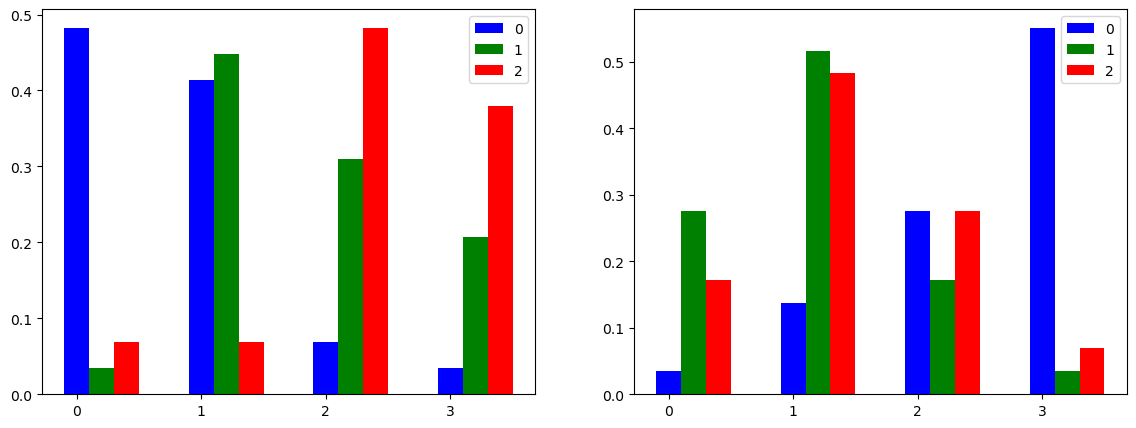

In [22]:
dd1.plot_model()
dd1.print_model()

In [23]:
dd1.get_class_proba(0)

[array([0.48275862, 0.4137931 , 0.06896552, 0.03448276]),
 array([0.03448276, 0.13793103, 0.27586207, 0.55172414])]

In [24]:
dd1.print_model(per_class=True)

 ++ Class(0) ++ 
[0.48275862 0.4137931  0.06896552 0.03448276]
[0.03448276 0.13793103 0.27586207 0.55172414]
 ++ Class(1) ++ 
[0.03448276 0.44827586 0.31034483 0.20689655]
[0.27586207 0.51724138 0.17241379 0.03448276]
 ++ Class(2) ++ 
[0.06896552 0.06896552 0.48275862 0.37931034]
[0.17241379 0.48275862 0.27586207 0.06896552]


In [25]:
y_pred = dd1.predict(X2d)
print("Test Set: Number of mislabeled points out of a total %d points : %d" % (X2d.shape[0], (y2 != y_pred).sum()))
y_pred = dd1.predict(X3d)
print("Noisy Set: Number of mislabeled points out of a total %d points : %d" % (X3d.shape[0], (y2 != y_pred).sum()))

Test Set: Number of mislabeled points out of a total 75 points : 17
Noisy Set: Number of mislabeled points out of a total 75 points : 41


In [26]:
dd1.score(X3d,y3)

0.4533333333333333

In [27]:
dd2 = probdist.Discrete(feature_probs=np.exp(dd1.feature_log_prob_))

In [28]:
dd2.__dict__

{'feature_prob_': array([[[0.48275862, 0.4137931 , 0.06896552, 0.03448276],
         [0.03448276, 0.44827586, 0.31034483, 0.20689655],
         [0.06896552, 0.06896552, 0.48275862, 0.37931034]],
 
        [[0.03448276, 0.13793103, 0.27586207, 0.55172414],
         [0.27586207, 0.51724138, 0.17241379, 0.03448276],
         [0.17241379, 0.48275862, 0.27586207, 0.06896552]]]),
 'alpha': 1.0,
 'class_prior_': None,
 'labels': None,
 'n_classes': 3,
 'n_features': 2,
 'n_categories': array([4, 4]),
 'classes_': array([0, 1, 2]),
 'priors': None}

++ Feature (0) ++
 


,0,1,2
P(0|.),0.482759,0.034483,0.068966
P(1|.),0.413793,0.448276,0.068966
P(2|.),0.068966,0.310345,0.482759
P(3|.),0.034483,0.206897,0.379310


++ Feature (1) ++
 


,0,1,2
P(0|.),0.034483,0.275862,0.172414
P(1|.),0.137931,0.517241,0.482759
P(2|.),0.275862,0.172414,0.275862
P(3|.),0.551724,0.034483,0.068966


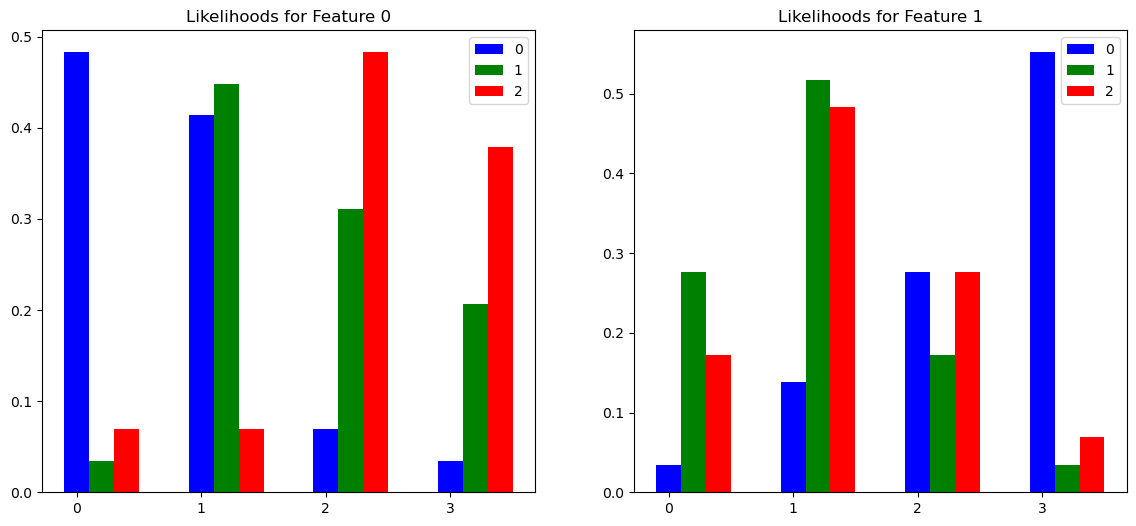

In [29]:
dd2.print_model()
dd2.plot_model()

In [30]:

dd3= probdist.Discrete(n_categories=[4,4])
dd3.fit(X=X1d,y=y1)
dd3.__dict__

{'feature_prob_': None,
 'alpha': 1.0,
 'class_prior_': None,
 'labels': None,
 'n_classes': 3,
 'n_categories': array([4, 4]),
 'n_features': 2,
 'classes_': None,
 'priors': None,
 'classes': array([0, 1, 2]),
 'feature_probs': [array([0.18666667, 0.32      , 0.29333333, 0.2       ]),
  array([0.14666667, 0.4       , 0.24      , 0.21333333])],
 'counts': [array([14, 24, 22, 15]), array([11, 30, 18, 16])]}

In [31]:
dd3.alpha=.2
dd3.__dict__

{'feature_prob_': None,
 'alpha': 0.2,
 'class_prior_': None,
 'labels': None,
 'n_classes': 3,
 'n_categories': array([4, 4]),
 'n_features': 2,
 'classes_': None,
 'priors': None,
 'classes': array([0, 1, 2]),
 'feature_probs': [array([0.18666667, 0.32      , 0.29333333, 0.2       ]),
  array([0.14666667, 0.4       , 0.24      , 0.21333333])],
 'counts': [array([14, 24, 22, 15]), array([11, 30, 18, 16])]}

In [32]:
X1d.shape

(75, 2)

<Axes: >

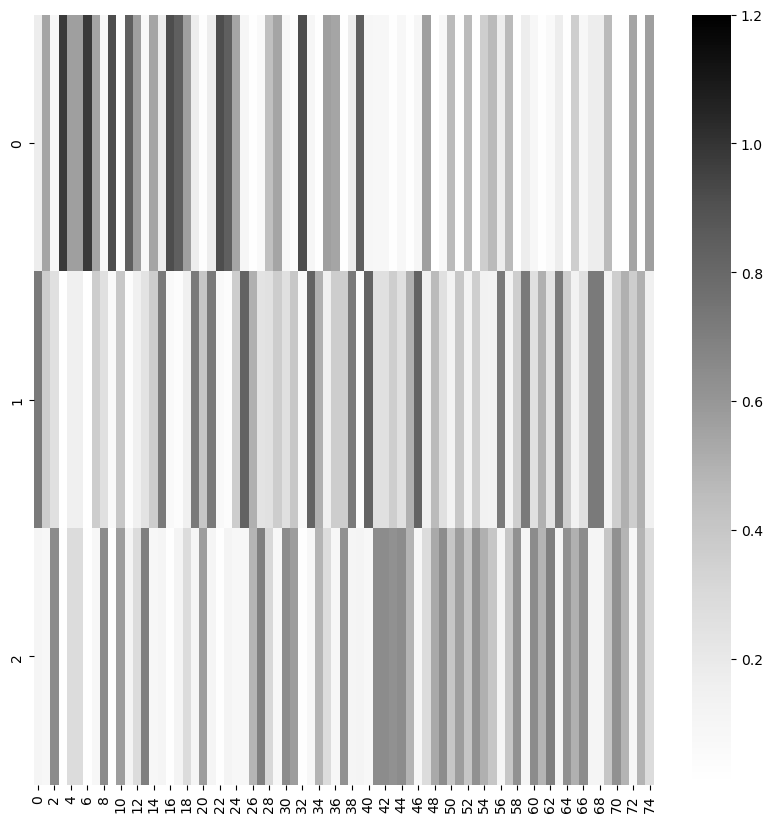

In [33]:
sns.heatmap(dd1.predict_proba(X3d).T,cmap='Greys',vmax=1.2)